In [1]:
import Pkg;

In [2]:
Pkg.activate(@__DIR__)
Pkg.instantiate();

 Activating environment at `D:\CMU_optimal_control\ContactDynamics\Project.toml`


In [3]:
using LinearAlgebra
using PyPlot

In [18]:
# Flight Phase
# Continuous Dynamics
function Dynamics(x)
    g = 9.81
    
    r = x[1:2]
    v = x[3:4]
    
    a =  [0; -g]
    
    xdot = [v; a]
    
    return xdot
end

Dynamics (generic function with 2 methods)

In [19]:
function Dynamics_rk4(x, dt)
    k1 = Dynamics(x)
    k2 = Dynamics(x + 0.5 * dt * k1)
    k3 = Dynamics(x + 0.5 * dt * k2)
    k4 = Dynamics(x +       dt * k3)
    x_next = x + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return x_next
end

Dynamics_rk4 (generic function with 1 method)

In [20]:
# gurad function
function guard(x)
    return x[2]
end

guard (generic function with 1 method)

In [21]:
# jump map function
function jump_map(x)
    γ = 0.9
    xn = [x[1];0.0;x[3];-γ*x[4]]
    return xn
end

jump_map (generic function with 1 method)

In [32]:
# Initial Condition
r0 = [0.0;2.2]
v0 = [1.5;0.0]

x0 = [r0;v0]

4-element Array{Float64,1}:
 0.0
 2.2
 1.5
 0.0

In [33]:
# Runsimulation
Nx = length(x0)
h = 0.01
Tf = 5.0
Nt = Int(Tf / h) + 1
thist = Array(range(0.0, Tf, step=h))
xhist = zeros(Nx, Nt)
xhist[:,1] = x0
for k=1:(Nt-1)
    xhist[:,k+1] = Dynamics_rk4(xhist[:,k], h)
    if guard(xhist[:,k+1]) <= 0
        xhist[:,k+1] = jump_map(xhist[:,k])
    end
end

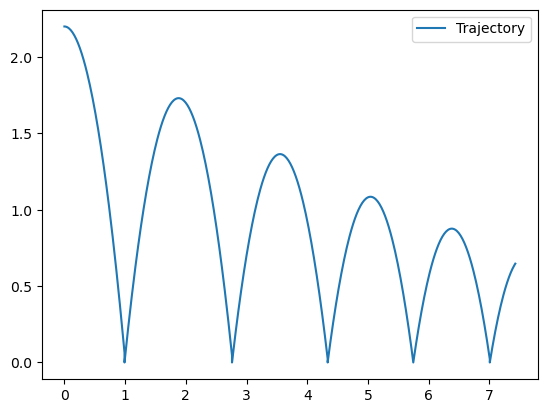

PyObject <matplotlib.legend.Legend object at 0x00000000010163A0>

In [34]:
plot(xhist[1,:], xhist[2,:],label="Trajectory")
legend()

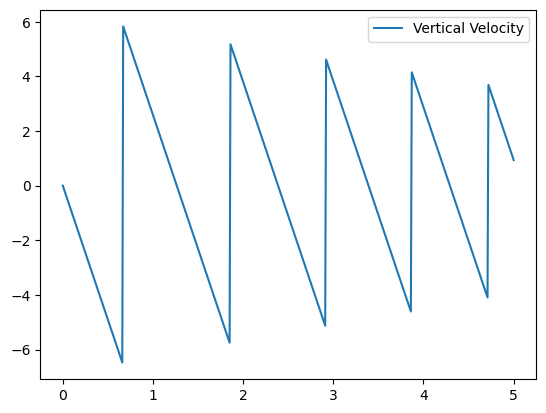

PyObject <matplotlib.legend.Legend object at 0x0000000000F904F0>

In [35]:
plot(thist, xhist[4,:],label="Vertical Velocity")
legend()